In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [98]:
x_data = pd.read_csv('Diabetes_XTrain.csv')
y_data = pd.read_csv('Diabetes_YTrain.csv')
X = x_data.values

In [7]:
type(x_data)

pandas.core.frame.DataFrame

In [11]:
x_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [12]:
y_data.columns

Index(['Outcome'], dtype='object')

In [13]:
y_data

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [17]:
x_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [30]:
diabetes_data_copy = x_data

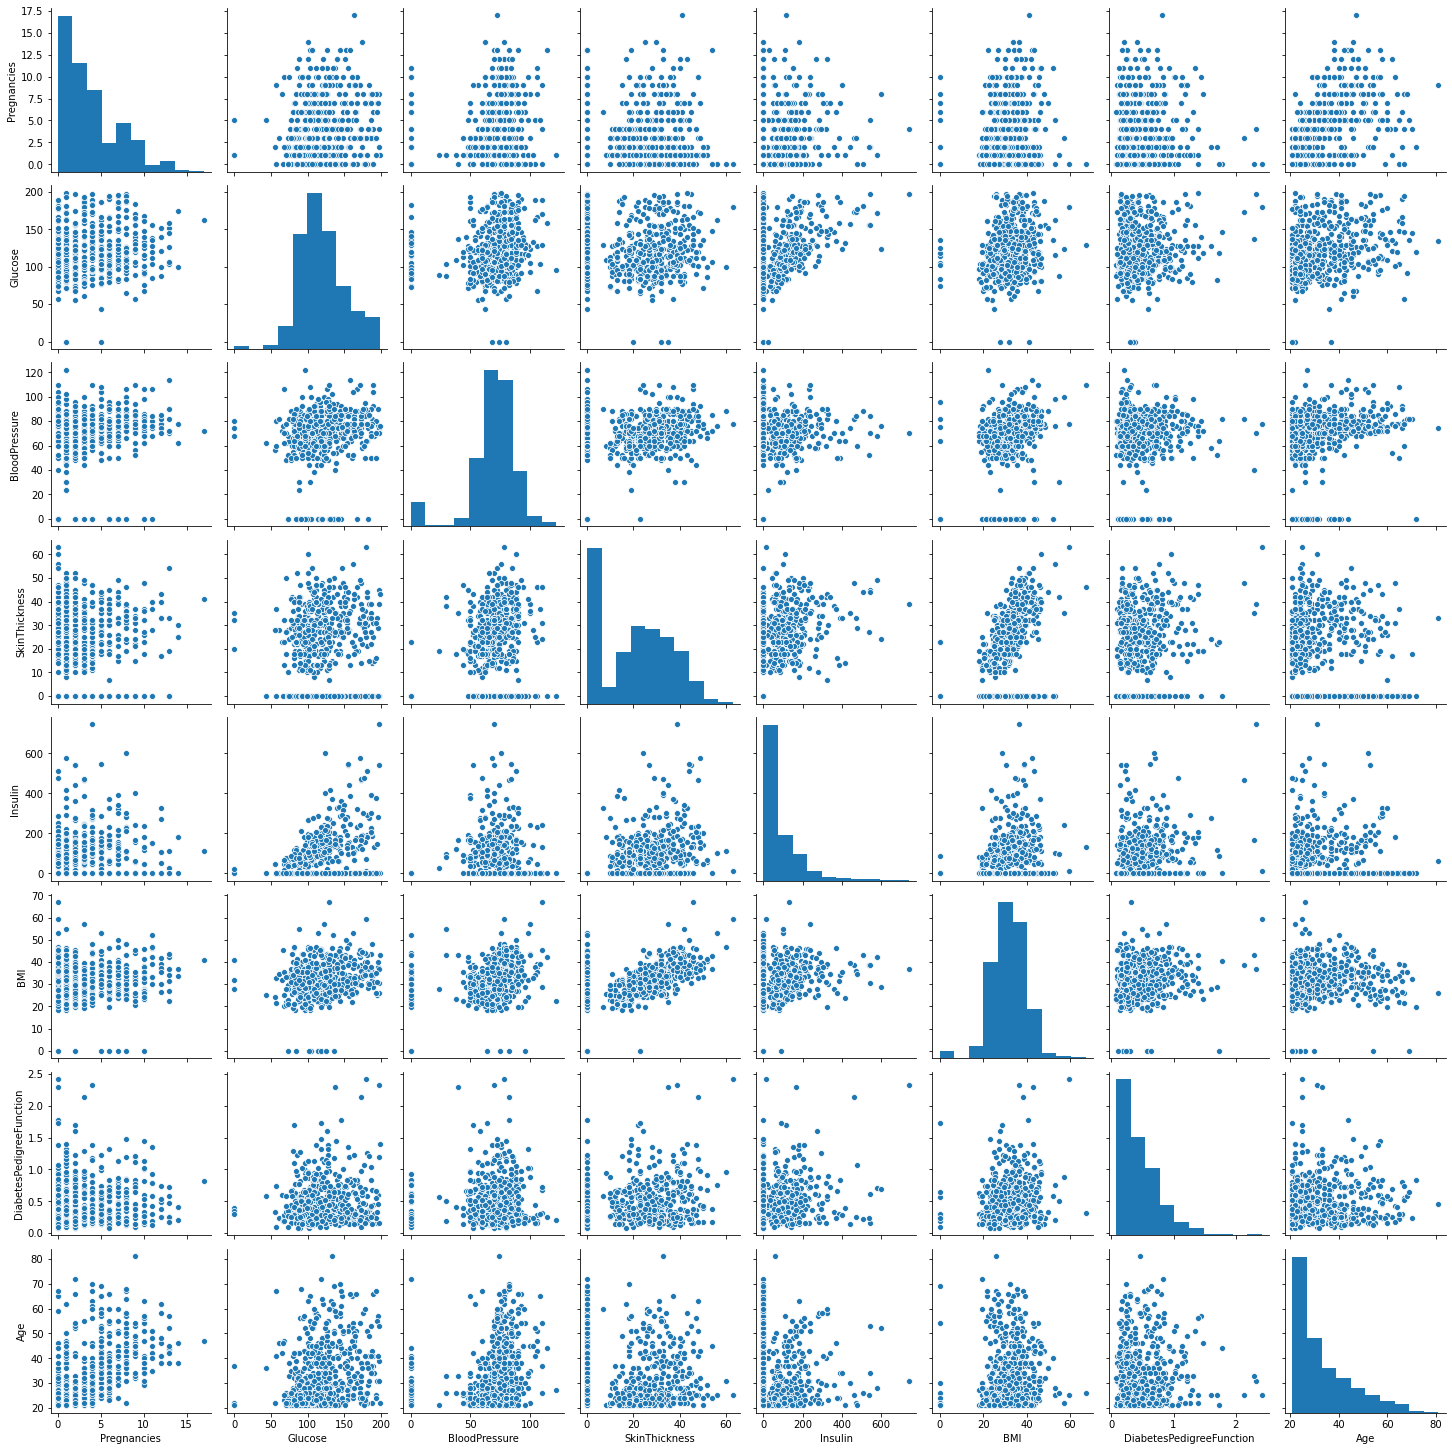

In [29]:
sns.pairplot(x_data)

In [92]:
diabetes_data_copy = x_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   1
Glucose                       3
BloodPressure                29
SkinThickness               171
Insulin                     280
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [90]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [ ]:
sns.pairplot(diabetes_data_copy)

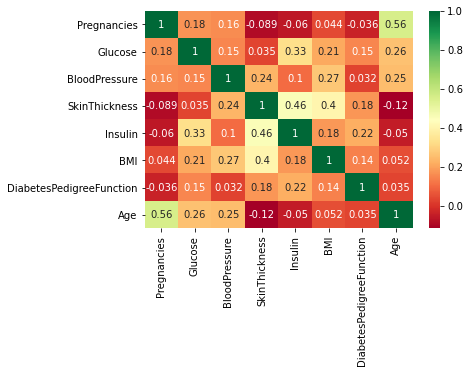

In [36]:
sns.heatmap(diabetes_data_copy.corr(),annot=True,cmap='RdYlGn')

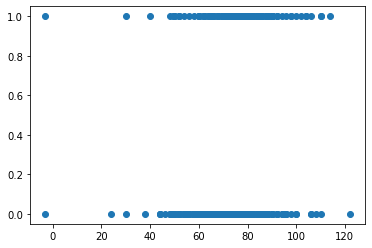

In [93]:
plt.scatter(diabetes_data_copy['BloodPressure'],y_data)

In [89]:
diabetes_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,575.0,3.748632,3.334259,-1.536482,1.00000,3.0000,6.00000,17.00
Glucose,573.0,120.146597,31.141727,-3.000000,99.00000,116.0000,139.00000,199.00
BloodPressure,547.0,72.160878,13.736788,-3.000000,64.00000,72.0000,80.00000,122.00
SkinThickness,405.0,28.782716,10.671383,-1.000000,21.00000,28.0000,37.00000,63.00
Insulin,296.0,146.875000,112.041675,14.000000,70.75000,115.0000,182.00000,744.00
BMI,567.0,32.224255,7.448870,-4.227253,27.15000,32.0000,36.80000,67.10
DiabetesPedigreeFunction,576.0,0.469426,0.492758,-7.985094,0.24675,0.3815,0.64125,2.42
Age,576.0,32.828125,12.050328,-2.000000,24.00000,28.0000,40.00000,81.00


In [62]:
#its important to normalise the data
col = diabetes_data_copy.columns
col[0]

'Pregnancies'

In [70]:
diabetes_data_copy['Pregnancies'].std()

3.328782672708689

In [81]:
diabetes_data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,NaN,-3,-3,-1,0,-4.220263,2.171463,-2
1,8.000000,110,76,0,0,27.800000,0.237000,58
2,7.000000,147,76,0,0,39.400000,0.257000,43
3,2.000000,100,66,20,90,32.900000,0.867000,28
4,4.000000,129,86,20,270,35.100000,0.231000,23
...,...,...,...,...,...,...,...,...
571,2.000000,111,60,0,0,26.200000,0.343000,23
572,7.000000,187,68,39,304,37.700000,0.254000,41
573,2.000000,122,60,18,106,29.800000,0.717000,22
574,4.000000,154,72,29,126,31.300000,0.338000,37


In [84]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [99]:
X

array([[  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

In [100]:
Y = y_data.values
print(X)

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]


In [94]:
def eucladian_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def KNN(X,Y,querypt,K=5):
    V = []
    m = X.shape[0]
    for i in range(m):
        d = eucladian_dist(X[i],querypt)
        V.append((d,Y[i]))
    
    V = sorted(V)
    V = V[:K]
    V = np.array(V)
    V_freq = np.unique(V[:,1],return_counts=True)
    #print(V_freq)
    index = V_freq[1].argmax()
    pred = V_freq[0][index]
    #print(V[0][1])
    return pred

In [ ]:
Y = KNN(X,y_data,)